Visualização de dados: Iremos utilizar o mesmo arquivo csv utilizado na aula de Exploração de Dados e da aula de Limpeza e Tratamento de dados. Primeiramente irei trazer em resumo a limpeza de dados que fiz na ultima aula, e com os dados tratados, criaremos suas visualizações.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')

df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


Utilização da função lambda para substituir a virgula das colunas "valor_transacoes_12m" e "limite_credito". Com essa substituição conseguiremos converter estas colunas para "float", uma vez que elas se encontram como "object"

In [3]:
fn = lambda valor: float(valor.replace(".","").replace(",","."))

Aqui aplicaremos pela função ".appy" a função lambda criada a cima

In [4]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

Utilizando a função ".dropna" removeremos os as linhas com valores Nulos do nosso arquivo csv:

In [5]:
df.dropna(inplace=True)

Função ".shape" para mostrar quantas linhas sobraram após a limpeza de dados

In [6]:
df.shape

(7081, 16)

Começaremos o estudo de visualização de dados a partir daqui:

In [7]:
sns.set_style('whitegrid') #definindo um estilo padrão para trabalhar com os gráficos

Para facilitar asa análises, iremos separar a base de dados em duas: Adimplentes e inadimplentes.

In [8]:
df_adimplente = df[df['default'] == 0]
df_inadimplente = df[df['default'] == 1]

Visualizações categóricas: Iremos visualizar a relação entre a variável resposta default com os atributos categóricos 

In [9]:
df.select_dtypes('object').head(n=5)
#.select_dtypes() selecionamos o tipo de coluna que queremos visualizar

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


Escolaridade:

C:\Users\rafae\AppData\Local\Temp\ipykernel_9796\1040602995.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
C:\Users\rafae\AppData\Local\Temp\ipykernel_9796\1040602995.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
C:\Users\rafae\AppData\Local\Temp\ipykernel_9796\1040602995.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)


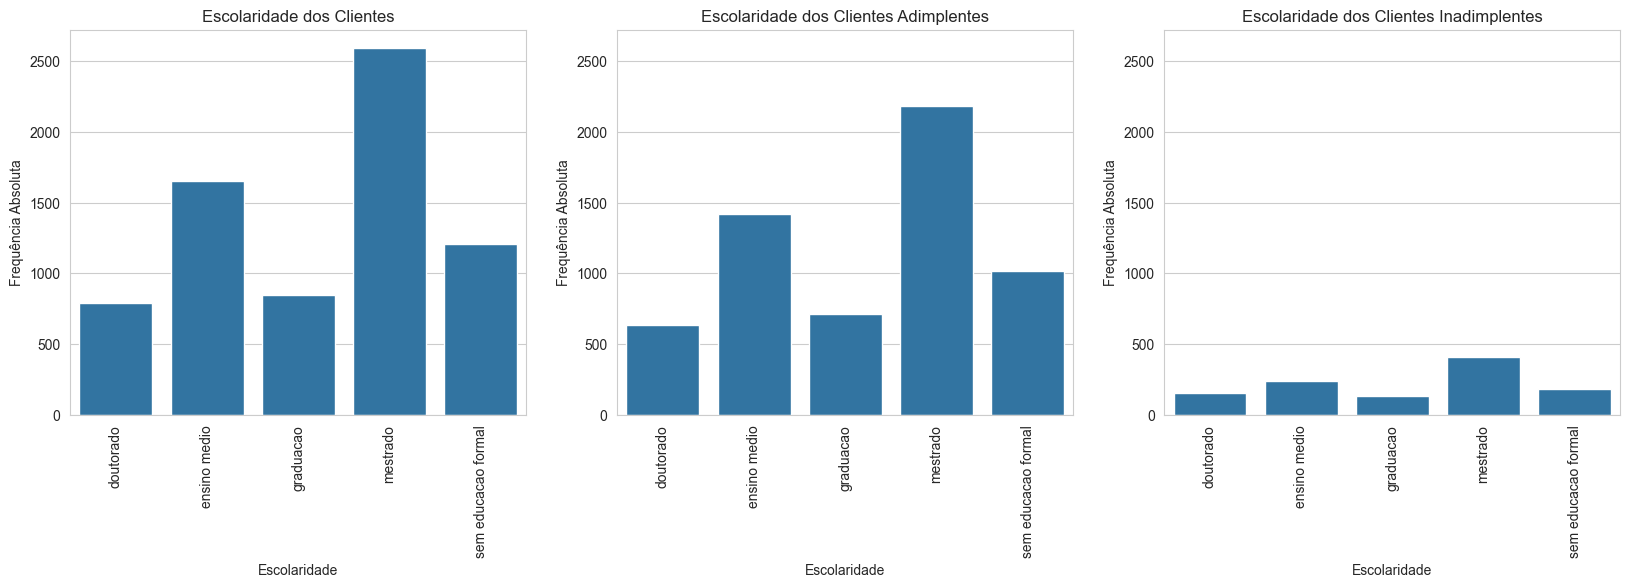

In [18]:

coluna = 'escolaridade' 
titulos = [ 'Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes' ]

figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
max_y = 0

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
  df_to_plot = dataframe[coluna].value_counts().reset_index()
  df_to_plot.columns = [coluna, 'frequencia_absoluta']
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(data=df_to_plot, x=coluna, y='frequencia_absoluta', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y

for eixo in eixos:
  eixo.set(ylim=(0, max_y))

plt.show()

Salário Anual:

C:\Users\rafae\AppData\Local\Temp\ipykernel_9796\3414654142.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
C:\Users\rafae\AppData\Local\Temp\ipykernel_9796\3414654142.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
C:\Users\rafae\AppData\Local\Temp\ipykernel_9796\3414654142.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)


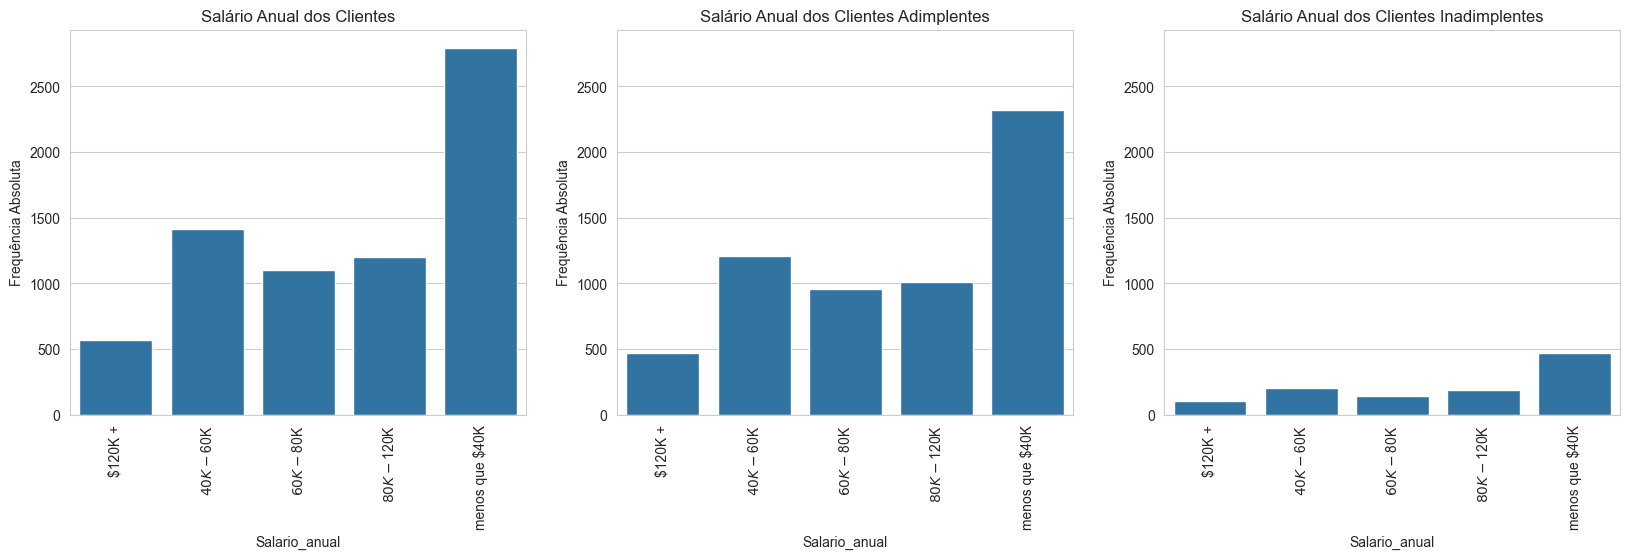

In [19]:
coluna = 'salario_anual' 
titulos = [ 'Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes' ]

figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
max_y = 0

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
  df_to_plot = dataframe[coluna].value_counts().reset_index()
  df_to_plot.columns = [coluna, 'frequencia_absoluta']
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(data=df_to_plot, x=coluna, y='frequencia_absoluta', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y

for eixo in eixos:
  eixo.set(ylim=(0, max_y))

plt.show()

Visualizações numéricas:
Nesta seção, vamos visualizar a relação entre a variável resposta default com os atributos numéricos

In [13]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


Quantidade de transações nos ultimos meses:

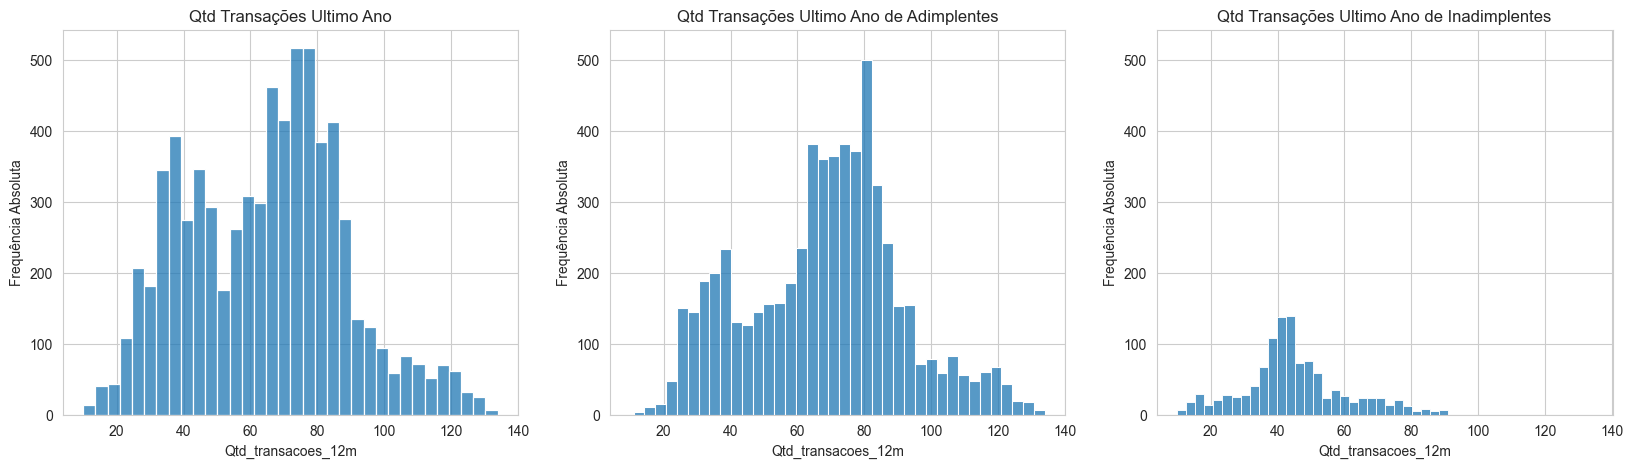

In [23]:
coluna = 'qtd_transacoes_12m' 
titulos = [ 'Qtd Transações Ultimo Ano', 'Qtd Transações Ultimo Ano de Adimplentes', 'Qtd Transações Ultimo Ano de Inadimplentes' ]

figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
max_y = 0

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
  
  f = sns.histplot(data=dataframe, x=coluna, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y

for eixo in eixos:
  eixo.set(ylim=(0, max_y))

plt.show()  

Valor das Transaações nos Úlitmos 12 meses

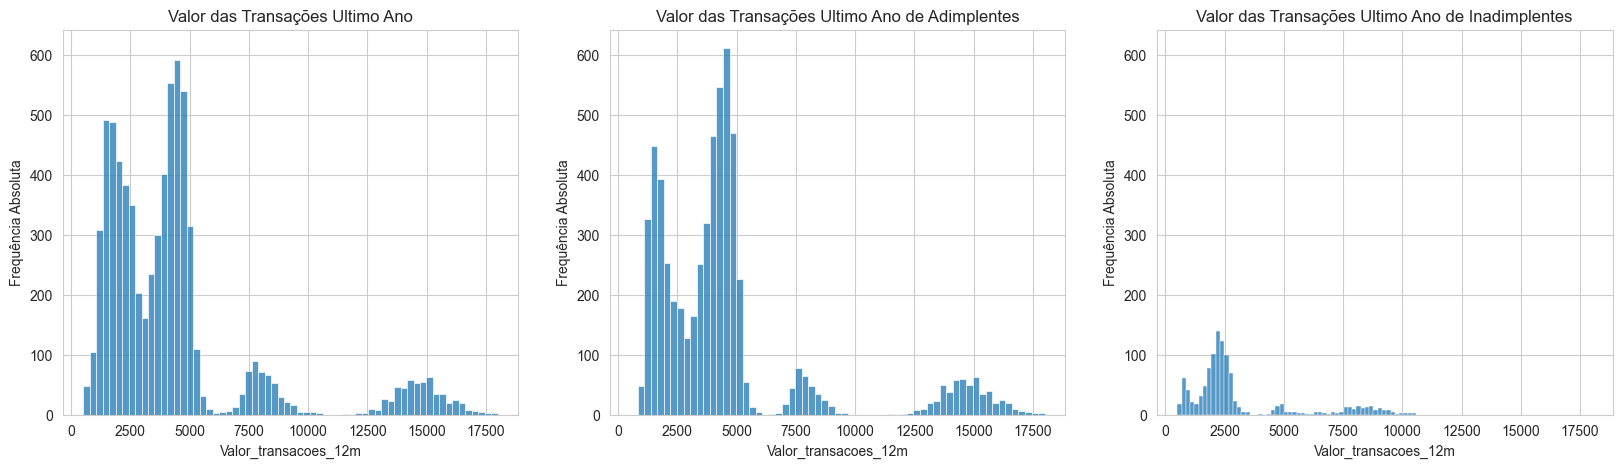

In [24]:
coluna = 'valor_transacoes_12m' 
titulos = [ 'Valor das Transações Ultimo Ano', 'Valor das Transações Ultimo Ano de Adimplentes', 'Valor das Transações Ultimo Ano de Inadimplentes' ]

figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
max_y = 0

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
  
  f = sns.histplot(data=dataframe, x=coluna, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y

for eixo in eixos:
  eixo.set(ylim=(0, max_y))

plt.show() 

Valor de Transações nos Últimos 12 Meses x Quantidade de Transações nos Últimos 12 Meses

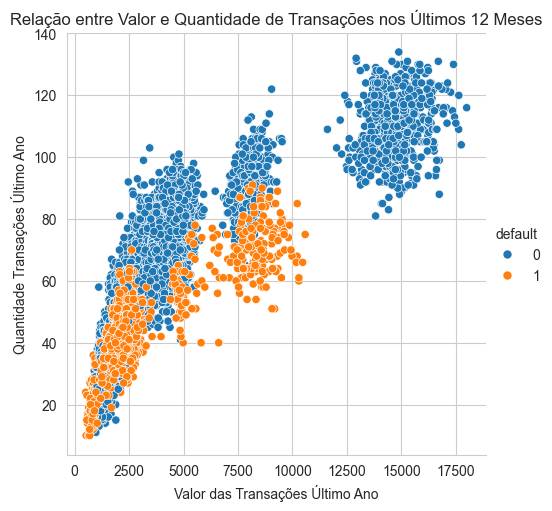

In [25]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_=f.set(
    title='Relação entre Valor e Quantidade de Transações nos Últimos 12 Meses',
    xlabel='Valor das Transações Último Ano',
    ylabel='Quantidade Transações Último Ano'
        )